In [1]:
from jupyterthemes import jtplot
jtplot.style(theme='oceans16',context='talk', fscale=1.4, spines=True, gridlines='--',ticks=True, grid=True)
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_table('Desktop/Python/pinlv_control_zc_0420.csv', sep ='\t', header=0)
df.head()

,city_id,city_name,show_times,hour_gap,last_time_accept_flag,total_show,total_accept
0,-1,NaN,1,-2549.496745,0,1,0
1,-1,NaN,1,-2484.542577,0,1,0
2,-1,NaN,1,-2471.639141,0,1,0
3,-1,NaN,1,-2461.568881,0,1,0
4,-1,NaN,1,-2459.902905,0,1,0


In [3]:
df = df[df['city_name'].notnull()]
df = df[df['show_times'].notnull()]
df = df.rename(columns={'city_id':'show_volume'})

In [29]:
df.head()
df.select('total_show', where=['index >= 10 and index <=15'])

,show_volume,city_name,show_times,hour_gap,last_time_accept_flag,total_show,total_accept
11662,1,北京市,1,-2546.113180,0,1,0
11663,1,北京市,1,-2534.767436,0,1,1
11664,1,北京市,1,-2529.778189,0,1,1
11665,1,北京市,1,-2528.048531,0,1,1
11666,1,北京市,1,-2517.875280,0,1,0


In [5]:
df_summary = df.pivot_table(index='show_times', columns='last_time_accept_flag',
                           values=['total_accept', 'show_volume'],
                           aggfunc={'total_accept': 'sum', 'show_volume':'count'})
df_summary.head()

show_volume           total_accept         
last_time_accept_flag           0         1            0        1
show_times                                                       
1                       3098802.0       NaN     768322.0      NaN
2                        623070.0  188085.0      96010.0  59925.0
3                         85637.0   17002.0      10055.0   5140.0
4                          9315.0     966.0        714.0    302.0
5                          1678.0     123.0         95.0     41.0

In [6]:
df_summary = df_summary.reset_index()

In [7]:
df_summary.head()

show_times show_volume           total_accept         
last_time_accept_flag                      0         1            0        1
0                              1   3098802.0       NaN     768322.0      NaN
1                              2    623070.0  188085.0      96010.0  59925.0
2                              3     85637.0   17002.0      10055.0   5140.0
3                              4      9315.0     966.0        714.0    302.0
4                              5      1678.0     123.0         95.0     41.0

In [8]:
df_summary['accept_rate', 0]=df_summary['total_accept',0]/df_summary['show_volume', 0]

In [9]:
df_summary['accept_rate', 1]= df_summary['total_accept', 1]/df_summary['show_volume',1]

In [10]:
df_summary[df_summary['show_times']<=10]

show_times show_volume           total_accept           \
last_time_accept_flag                      0         1            0        1   
0                              1   3098802.0       NaN     768322.0      NaN   
1                              2    623070.0  188085.0      96010.0  59925.0   
2                              3     85637.0   17002.0      10055.0   5140.0   
3                              4      9315.0     966.0        714.0    302.0   
4                              5      1678.0     123.0         95.0     41.0   
5                              6       437.0      16.0         20.0      5.0   
6                              7       155.0       6.0          7.0      2.0   
7                              8        56.0       2.0          3.0      2.0   
8                              9        47.0       2.0          1.0      1.0   
9                             10        21.0       NaN          0.0      NaN   

                      accept_rate            
last_time_accept_flag           0         1  
0                        0.247942       NaN  
1                        0.154092  0.318606  
2                        0.117414  0.302317  
3                        0.076651  0.312629  
4                        0.056615  0.333333  
5                        0.045767  0.312500  
6                        0.045161  0.333333  
7                        0.053571  1.000000  
8                        0.021277  0.500000  
9                        0.000000       NaN

In [11]:
df_summary.columns

MultiIndex(levels=[['show_volume', 'total_accept', 'show_times', 'accept_rate'], [0, 1, '']],
           labels=[[2, 0, 0, 1, 1, 3, 3], [2, 0, 1, 0, 1, 0, 1]],
           names=[None, 'last_time_accept_flag'])

In [12]:
df_pic = df_summary.melt(id_vars=['show_times'], value_vars=['show_volume', 'accept_rate'])

In [13]:
df_pic[df_pic['show_times']<=10][:5]

,show_times,None,last_time_accept_flag,value
0,1,show_volume,0,3098802.0
1,2,show_volume,0,623070.0
2,3,show_volume,0,85637.0
3,4,show_volume,0,9315.0
4,5,show_volume,0,1678.0


In [14]:
df_pic.columns = ['show_times', 'variable_name', 'last_time_accept', 'accept_rate']

Text(0.5,1,'The relationship between T and T+1 diversion')

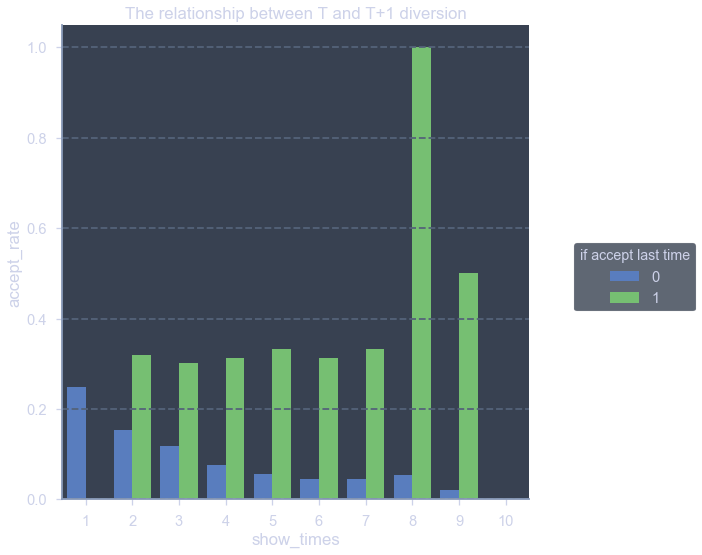

In [15]:
g = sns.factorplot(data=df_pic[(df_pic['variable_name']=='accept_rate')&(df_pic['show_times']<=10)],
                  x='show_times', y='accept_rate',
                  hue='last_time_accept', size=6, kind='bar', palette='muted', legend=False)
g.set_ylabels('accept_rate')
g.set_xlabels('show_times')
g.add_legend(title='if accept last time')
fig=plt.gcf()
fig.set_size_inches(10.5,8)
plt.title('The relationship between T and T+1 diversion')

In [16]:
df_total = df.groupby('show_times', as_index=False)['total_accept', 'show_volume'].aggregate({'total_accept':'sum', 
                                                                                    'show_volume':'count'})

In [17]:
df_total['accept_rate'] = df_total['total_accept']/df_total['show_volume']

In [18]:
df_total[df_total['show_times']<=10]

,show_times,total_accept,show_volume,accept_rate
0,1,768322,3098802,0.247942
1,2,155935,811155,0.192238
2,3,15195,102639,0.148043
3,4,1016,10281,0.098823
4,5,136,1801,0.075514
5,6,25,453,0.055188
6,7,9,161,0.055901
7,8,5,58,0.086207
8,9,2,49,0.040816
9,10,0,21,0.000000


In [19]:
df_total['show_times(%)'] = df_total['show_volume']/df_total['show_volume'].sum()
df_total.head()

,show_times,total_accept,show_volume,accept_rate,show_times(%)
0,1,768322,3098802,0.247942,0.769785
1,2,155935,811155,0.192238,0.201502
2,3,15195,102639,0.148043,0.025497
3,4,1016,10281,0.098823,0.002554
4,5,136,1801,0.075514,0.000447


Text(0.5,1,'Accept Rate Under Various Show Times')

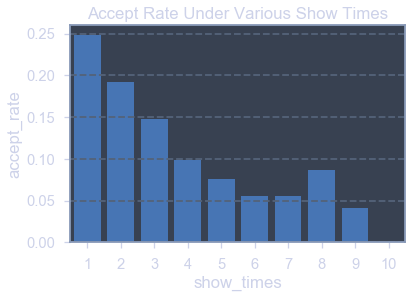

In [20]:
sns.barplot(data=df_total[df_total['show_times']<=10], x='show_times', y='accept_rate', color='b')
plt.title('Accept Rate Under Various Show Times')

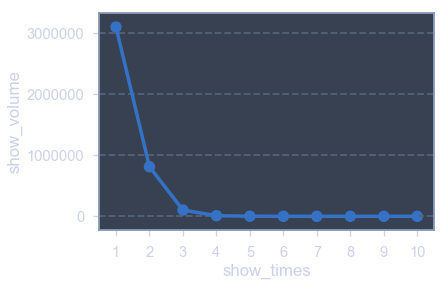

In [21]:
sns.pointplot(data=df_total[df_total['show_times']<=10], x='show_times', y='show_volume', color='b')

In [22]:
with pd.option_context('display.float_format', lambda x: '%.2f' % x):
    print(df_total[df_total['show_times']<=10])


   show_times  total_accept  show_volume  accept_rate  show_times(%)
0           1        768322      3098802         0.25           0.77
1           2        155935       811155         0.19           0.20
2           3         15195       102639         0.15           0.03
3           4          1016        10281         0.10           0.00
4           5           136         1801         0.08           0.00
5           6            25          453         0.06           0.00
6           7             9          161         0.06           0.00
7           8             5           58         0.09           0.00
8           9             2           49         0.04           0.00
9          10             0           21         0.00           0.00


In [23]:
df_summary.head()

show_times show_volume           total_accept           \
last_time_accept_flag                      0         1            0        1   
0                              1   3098802.0       NaN     768322.0      NaN   
1                              2    623070.0  188085.0      96010.0  59925.0   
2                              3     85637.0   17002.0      10055.0   5140.0   
3                              4      9315.0     966.0        714.0    302.0   
4                              5      1678.0     123.0         95.0     41.0   

                      accept_rate            
last_time_accept_flag           0         1  
0                        0.247942       NaN  
1                        0.154092  0.318606  
2                        0.117414  0.302317  
3                        0.076651  0.312629  
4                        0.056615  0.333333

In [24]:
idx = pd.IndexSlice
temp = df_summary.loc[:, idx[('show_volume','show_times','accept_rate'),:]]
df_summary_final = temp[temp['show_times']<=10]

In [25]:
df_summary_final.columns

MultiIndex(levels=[['show_volume', 'total_accept', 'show_times', 'accept_rate'], [0, 1, '']],
           labels=[[2, 0, 0, 3, 3], [2, 0, 1, 0, 1]],
           names=[None, 'last_time_accept_flag'])

In [26]:
df_summary_final.columns.levels=[['show_volume', 'total_accept', 'show_times', 'accept_rate'],[0,1,'']]
df_summary_final.head()

/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: setting `levels` directly is deprecated. Use set_levels instead
  """Entry point for launching an IPython kernel.


show_times show_volume           accept_rate          
last_time_accept_flag                      0         1           0         1
0                              1   3098802.0       NaN    0.247942       NaN
1                              2    623070.0  188085.0    0.154092  0.318606
2                              3     85637.0   17002.0    0.117414  0.302317
3                              4      9315.0     966.0    0.076651  0.312629
4                              5      1678.0     123.0    0.056615  0.333333

In [27]:
df_summary_final.to_csv('Desktop/Python/daoliu_zc.csv', sep=',', encoding='UTF-8', index=False)